## Initialization

### 초기화 및 모듈 불러오기

In [1]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del all

In [2]:
import numpy as np
import os, sys
import importlib
import matplotlib.pyplot as plt
sys.path.append("../")
import module_opt
importlib.reload(module_opt)
from module_opt import *
from breguet_range_equation_fromprofessor import *

In [3]:
# s = np.array([1, 10])
# B = np.array([[1, 2], [5, 3]])
# s @ (B @ s)
# BssB = (B @ s).reshape(-1, 1) @ (s @ B).reshape(1, -1)
# Bs = B @ s
# Bs
# sB = s @ B
# sB
# ss = s.reshape(-1, 1) @ s.reshape(1, -1)
# ss

## Assignment\#3(Constrained Optimization) - Problem 2
minimize &nbsp; &nbsp; Roesnbrock Function  
subject to &nbsp; &nbsp; c1 = Line  
or  
subject to &nbsp; &nbsp; c2 = disk

1st Algorithm : QPM(Quadratic Penalty Method)  
2ndd Algorithm : SQP(Sequential Quadratic Programming)

### - Rosenbrock Function

1. Rosenbrock function on a disk  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 1 - x_1^2 - x_2^2 = 0 $

2. Rosenbrock function on straight line  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 1 - x_1 - x_2 = 0 $

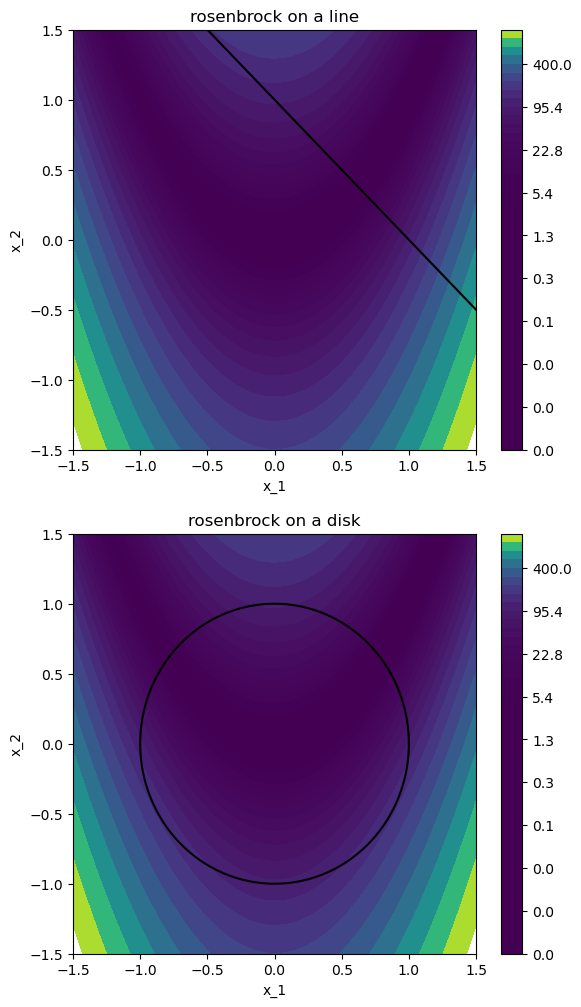

In [4]:
### define functions
f_rosenbrock_eqline = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqline = lambda x : 1 - x[0] - x[1]

f_rosenbrock_eqdisk = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqdisk = lambda x : 1 - x[0]**2 - x[1]**2

step_rosenbrock_eq = .01
grid_rosenbrock_eq = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq), np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq))
fval_grid_rosenbrock_eq = f_rosenbrock_eqline(grid_rosenbrock_eq)

### plot functions
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 6*2))

contour_0 = axes[0].contourf(grid_rosenbrock_eq[0], grid_rosenbrock_eq[1], fval_grid_rosenbrock_eq, levels=np.logspace(-3, 3.1))
x_line_eq = np.arange(-0.5, 1.5+.01, .01); y_line_eq = 1 - x_line_eq
axes[0].plot(x_line_eq, y_line_eq, 'k')
axes[0].set_xlabel('x_1'); axes[0].set_ylabel('x_2'); axes[0].set_title('rosenbrock on a line')
fig.colorbar(contour_0, ax=axes[0])

contour_1 = axes[1].contourf(grid_rosenbrock_eq[0], grid_rosenbrock_eq[1], fval_grid_rosenbrock_eq, levels=np.logspace(-3, 3.1))
x_disk_eq = np.arange(-1.0, 1+.0001, .0001); y_disk_eq_pos = (1 - x_disk_eq**2)**.5; y_disk_eq_neg = -(1 - x_disk_eq**2)**.5
axes[1].plot(x_disk_eq, y_disk_eq_pos, 'k') 
axes[1].plot(x_disk_eq, y_disk_eq_neg, 'k')
axes[1].set_xlabel('x_1'); axes[1].set_ylabel('x_2'); axes[1].set_title('rosenbrock on a disk')
fig.colorbar(contour_1, ax=axes[1])


In [5]:
f1 = f_rosenbrock_eqline # objective function
ce_1 = [c_rosenbrock_eqline] # equality constraints
ci_1 = [] # inequality constraints
x0_1 = np.array([-.5, -.5])

### - Solve Rosenbrock with Line Constraint using SQP, QPM

In [6]:
result1_qpm = qpm(f=f1, ce=ce_1, ci=ci_1, x0=x0_1, inner_opt=3, tol=1e-4) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs

mu_0 = 1
tau_0 = 0.2
Since ||grad(x0)|| = 217.0921463262293 > 0.2, x0 : [-0.5 -0.5] is not an optimum point. Optimization begins !
BFGS
x_1 : [1.05 1.02]
f_1 : 1.255574997820803
‖∇f(x_1)‖ : 39.00201655210813
‖∆x_1‖ : 2.1709214632622933
recent alpha : 0.010000000000000002
recent p : [154.99999999 152.        ]

BFGS
x_2 : [1.00840612 1.07762812]
f_2 : 0.9588041209767206
‖∇f(x_2)‖ : 26.88315110075506
‖∆x_2‖ : 0.07107075206140331
recent alpha : 0.0020791192395972252
recent p : [-20.00553052  27.71756558]

BFGS
x_3 : [1.017092   1.03501128]
f_3 : 0.5537814287321259
‖∇f(x_3)‖ : 1.448448150592046
‖∆x_3‖ : 0.04349298705873898
recent alpha : 1
recent p : [ 0.00868588 -0.04261684]

BFGS
x_4 : [1.00994053 1.01717362]
f_4 : 0.5283680557403723
‖∇f(x_4)‖ : 2.229860859099647
‖∆x_4‖ : 0.019217846264871878
recent alpha : 1
recent p : [-0.00715147 -0.01783766]

BFGS
x_5 : [0.89968794 0.77402769]
f_5 : 0.3624006547326546
‖∇f(x_5)‖ : 14.688240119492827
‖∆x_5‖ : 0.2669748609423305
recent alpha : 1
recent 

In [7]:
result1_sqp = sqp(f=f1, ce=ce_1, ci=ci_1, x0=x0_1, inner_opt=3, tol=1e-6, tol_inter=1e-4) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs


 log - SQP
‖∆x‖ = 1.27e+00, x01 = [0.75000001, -0.75000000] | f = 1.7233e+02, ‖∇L‖ = 5.55e+02, ‖ce‖∞ = 1.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 1.50e+02, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 2.10e+00, x02 = [-0.15136025, 1.15136010] | f = 1.2867e+02, ‖∇L‖ = 4.32e+02, ‖ce‖∞ = 1.57e-07, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 1.49e+02, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 4.15e-01, x03 = [0.14203804, 0.85796185] | f = 7.0925e+01, ‖∇L‖ = 1.83e+02, ‖ce‖∞ = 1.10e-07, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 1.30e+02, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 7.04e-01, x04 = [0.64016909, 0.35983086] | f = 3.7933e-01, ‖∇L‖ = 4.70e+02, ‖ce‖∞ = 5.01e-08, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 3.31e+02, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 3.25e-02, x05 = [0.61715727, 0.38284265] | f = 1.4695e-01, ‖∇L‖ = 9.74e+00, ‖ce‖∞ = 7.99e-08, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 6.41e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 2.25e-03, x06 = [0.61874983, 0.38125036] | f = 1.4561e-01, ‖∇L‖ = 3.98e-02, ‖ce‖∞ = 1.95e-07, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 3.27e-01, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆

#### - Plot Convergence log of QPM, SQP for rosenbrock function with line equality constraint

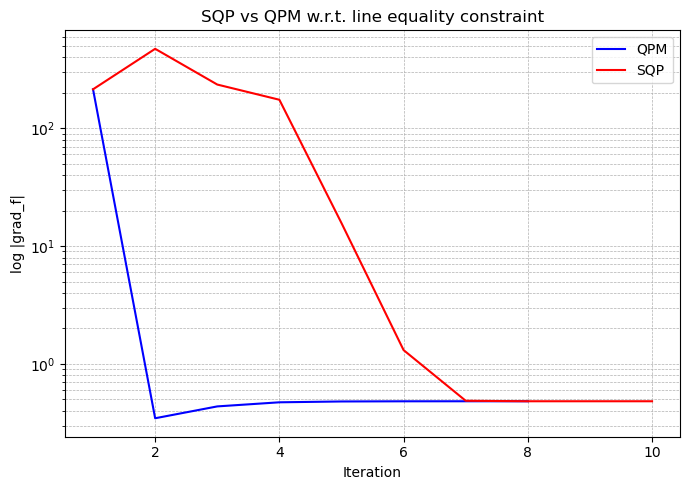

In [8]:
grad_f_qpm_eqline = result1_qpm[2]
grad_f_sqp_eqline = result1_sqp[2]

# grad_f_sqp_eqline, grad_f_qpm_eqline : shape (n, 2)
# 각 iteration마다 gradient의 norm 계산
norm_qpm = np.linalg.norm(grad_f_qpm_eqline, axis=1)
norm_sqp = np.linalg.norm(grad_f_sqp_eqline, axis=1)

# x축 (iteration index)
iterations_qpm = np.arange(1, len(norm_qpm) + 1)
iterations_sqp = np.arange(1, len(norm_sqp) + 1)

# 그래프 그리기
plt.figure(figsize=(7,5))
plt.plot(iterations_qpm, norm_qpm, 'b-', label='QPM')
plt.plot(iterations_sqp, norm_sqp, 'r-', label='SQP')
plt.yscale('log')  # y축 로그 스케일

# 레이블, 제목, 범례
plt.xlabel('Iteration')
plt.ylabel('log |grad_f|')
plt.title('SQP vs QPM w.r.t. line equality constraint')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

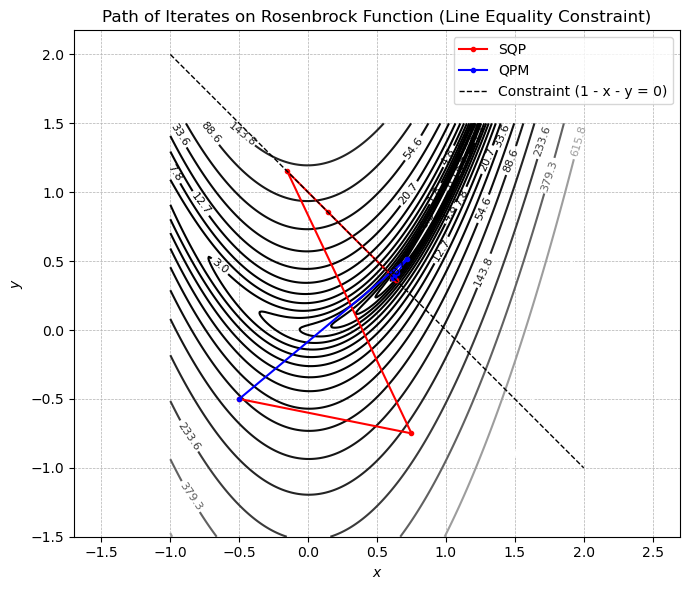

In [9]:
### define functions
f_rosenbrock_eqline = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqline = lambda x : 1 - x[0] - x[1]

f_rosenbrock_eqdisk = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqdisk = lambda x : 1 - x[0]**2 - x[1]**2

### grid and f value
step_rosenbrock_eq = .01
grid_rosenbrock_eq = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq), np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq))
fval_grid_rosenbrock_eq = f_rosenbrock_eqline(grid_rosenbrock_eq)

### log of x of each method
x_sqp_eqline = result1_sqp[0]
x_qpm_eqline = result1_qpm[0]

# === Rosenbrock function (line equality constraint) ===
f_rosenbrock_eqline = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2

# === Grid in the desired range ===
step_rosenbrock_eq = 0.01
xg, yg = np.meshgrid(
    np.arange(-1, 2 + step_rosenbrock_eq, step_rosenbrock_eq),
    np.arange(-1.5, 1.5 + step_rosenbrock_eq, step_rosenbrock_eq)
)
fval_grid_rosenbrock_eq = f_rosenbrock_eqline(xg, yg)

# === Extract paths ===
x_sqp_eqline = np.array(x_sqp_eqline)  # (n, 2)
x_qpm_eqline = np.array(x_qpm_eqline)  # (n, 2)

# === Plot contour and paths ===
plt.figure(figsize=(7,6))
contours = plt.contour(
    xg, yg, fval_grid_rosenbrock_eq,
    levels=np.logspace(-1, 3, 20), cmap='gray'
)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

# SQP path (red)
plt.plot(x_sqp_eqline[:,0], x_sqp_eqline[:,1], 'r-o', label='SQP', markersize=3)
# QPM path (blue)
plt.plot(x_qpm_eqline[:,0], x_qpm_eqline[:,1], 'b-o', label='QPM', markersize=3)

# Constraint line c1(x,y)=1-x-y=0
xx = np.linspace(-1, 2, 300)
plt.plot(xx, 1 - xx, 'k--', lw=1, label='Constraint (1 - x - y = 0)')

# === Scope ===
plt.xlim([-1, 2])
plt.ylim([-1.5, 1.5])

# === Labels and formatting ===
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Path of Iterates on Rosenbrock Function (Line Equality Constraint)')
plt.legend()
plt.grid(True, ls='--', lw=0.5)
plt.axis('equal')
plt.tight_layout()
plt.show()

### - Solve Rosenbrock with Disk Constraint using SQP, QPM

In [10]:
f2 = f_rosenbrock_eqdisk # objective function
ce_2 = [c_rosenbrock_eqdisk] # equality constraints
ci_2 = [] # inequality constraints
x0_2 = np.array([0, 0])

In [11]:
x0_2 = np.array([-.5, .5])
result2_qpm = qpm(f=f2, ce=ce_2, ci=ci_2, x0=x0_2, inner_opt=3, tol=1e-4) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs

mu_0 = 1
tau_0 = 0.2
Since ||grad(x0)|| = 68.60393574609752 > 0.2, x0 : [-0.5  0.5] is not an optimum point. Optimization begins !
BFGS
x_1 : [-0.68402473  0.30822686]
f_1 : 5.480696891722453
‖∇f(x_1)‖ : 56.52503560465513
‖∆x_1‖ : 0.26578570334077684
recent alpha : 0.003874204890000001
recent p : [-47.5 -49.5]

BFGS
x_2 : [-0.41022287  0.00518546]
f_2 : 4.994657003726526
‖∇f(x_2)‖ : 43.587115171136176
‖∆x_2‖ : 0.4084134537715138
recent alpha : 0.06561
recent p : [ 4.1731728  -4.61882936]

BFGS
x_3 : [-0.51550293  0.30199134]
f_3 : 2.6349031968345877
‖∇f(x_3)‖ : 8.55286581961951
‖∆x_3‖ : 0.3149247892260444
recent alpha : 1
recent p : [-0.10528006  0.29680588]

BFGS
x_4 : [-0.48553961  0.23823203]
f_4 : 2.4577204693342107
‖∇f(x_4)‖ : 1.8087962213993607
‖∆x_4‖ : 0.07044892333576784
recent alpha : 1
recent p : [ 0.02996332 -0.06375932]

BFGS
x_5 : [-0.44118667  0.1829388 ]
f_5 : 2.3886294296074166
‖∇f(x_5)‖ : 5.009359043305519
‖∆x_5‖ : 0.07088387931179842
recent alpha : 1
recent p : [ 0.04

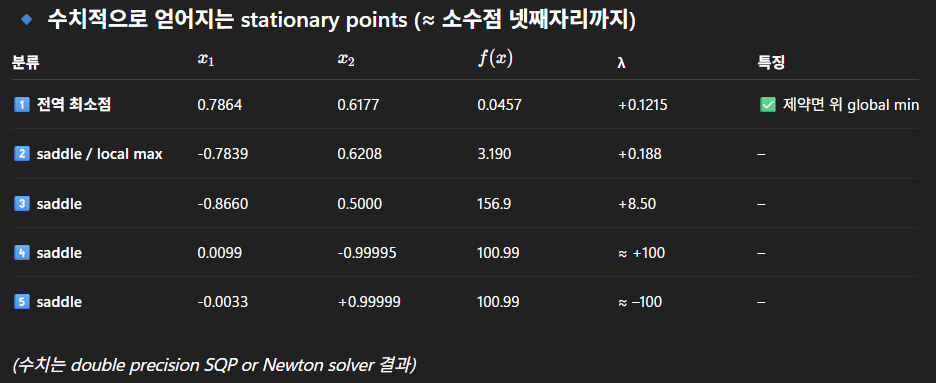

위와 같이 지금 현재 문제에는 총 5개의 KKT stationary points(∇L = 0)가 존재함.  
SQP는 initial point에서 가장 가까운 KKT point로 수렴할 뿐임.

In [12]:
x0_2 = np.array([1.5, 1.5])
result2_sqp = sqp(f=f2, ce=ce_2, ci=ci_2, x0=x0_2, inner_opt=3, tol=1e-6, tol_inter=1e-4) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs
# result2_sqp = alm(f=f2, ce=ce_2, ci=ci_2, x0=x0_2, inner_opt=3, tol=1e-6) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs


 log - SQP
‖∆x‖ = 4.15e-01, x01 = [1.20597331, 1.79288737] | f = 1.1502e+01, ‖∇L‖ = 3.05e+02, ‖ce‖∞ = 3.67e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 5.00e+01, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 9.21e-01, x02 = [1.02853201, 0.88908329] | f = 2.8500e+00, ‖∇L‖ = 7.42e+01, ‖ce‖∞ = 8.48e-01, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 3.32e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 3.28e-01, x03 = [0.85788178, 0.60940832] | f = 1.6218e+00, ‖∇L‖ = 5.24e+01, ‖ce‖∞ = 1.07e-01, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 2.55e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 8.41e-02, x04 = [0.79068344, 0.65997104] | f = 1.6485e-01, ‖∇L‖ = 1.55e+01, ‖ce‖∞ = 6.07e-02, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 6.45e+00, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 4.12e-02, x05 = [0.78650522, 0.61895799] | f = 4.5594e-02, ‖∇L‖ = 5.21e-01, ‖ce‖∞ = 1.70e-03, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 1.99e-02, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 1.26e-03, x06 = [0.78641428, 0.61770144] | f = 4.5675e-02, ‖∇L‖ = 2.82e-03, ‖ce‖∞ = 2.50e-06, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 1.21e-01, ‖ν‖ = 0.00e+00 


Final iterate: 

#### - Plot Convergence log of QPM, SQP for rosenbrock function with disk equality constraint

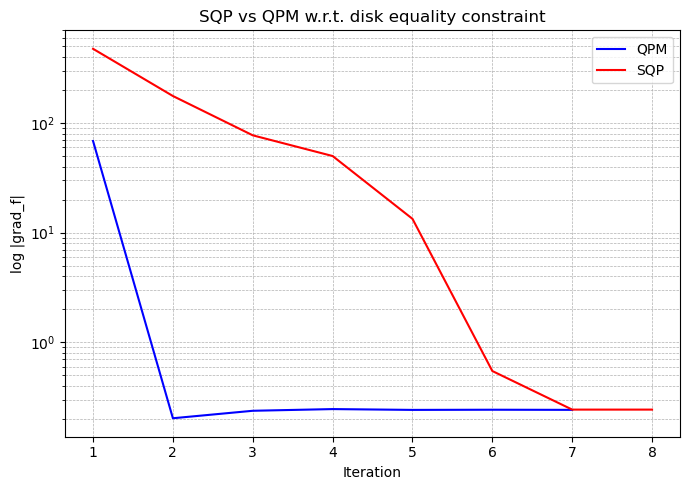

In [13]:
grad_f_qpm_eqdisk = result2_qpm[2]
grad_f_sqp_eqdisk = result2_sqp[2]

# grad_f_sqp_eqdisk, grad_f_qpm_eqdisk : shape (n, 2)
# 각 iteration마다 gradient의 norm 계산
norm_qpm = np.linalg.norm(grad_f_qpm_eqdisk, axis=1)
norm_sqp = np.linalg.norm(grad_f_sqp_eqdisk, axis=1)

# x축 (iteration index)
iterations_qpm = np.arange(1, len(norm_qpm) + 1)
iterations_sqp = np.arange(1, len(norm_sqp) + 1)

# 그래프 그리기
plt.figure(figsize=(7,5))
plt.plot(iterations_qpm, norm_qpm, 'b-', label='QPM')
plt.plot(iterations_sqp, norm_sqp, 'r-', label='SQP')
plt.yscale('log')  # y축 로그 스케일

# 레이블, 제목, 범례
plt.xlabel('Iteration')
plt.ylabel('log |grad_f|')
plt.title('SQP vs QPM w.r.t. disk equality constraint')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

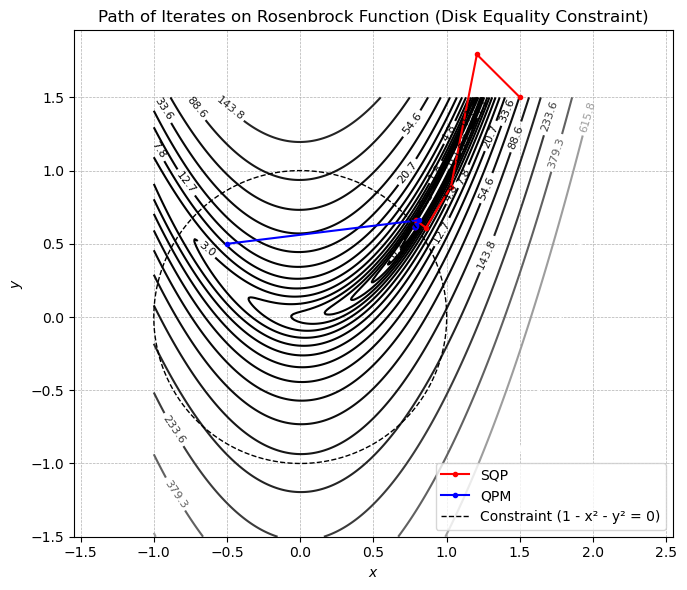

In [14]:
### define functions
f_rosenbrock_eqline = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqline = lambda x : 1 - x[0] - x[1]

f_rosenbrock_eqdisk = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqdisk = lambda x : 1 - x[0]**2 - x[1]**2

### grid and f value
step_rosenbrock_eq = .01
grid_rosenbrock_eq = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq), np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq))
fval_grid_rosenbrock_eq = f_rosenbrock_eqline(grid_rosenbrock_eq)

### log of x of each method
x_sqp_eqdisk = result2_sqp[0]
x_qpm_eqdisk = result2_qpm[0]

# === Rosenbrock function (disk equality constraint) ===
f_rosenbrock_eqdisk = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
c_rosenbrock_eqdisk = lambda x, y: 1 - x**2 - y**2

# === Grid in the desired range ===
step_rosenbrock_eq = 0.01
xg, yg = np.meshgrid(
    np.arange(-1, 2 + step_rosenbrock_eq, step_rosenbrock_eq),
    np.arange(-1.5, 1.5 + step_rosenbrock_eq, step_rosenbrock_eq)
)
fval_grid_rosenbrock_eq = f_rosenbrock_eqdisk(xg, yg)

# === Extract optimization paths ===
x_sqp_eqdisk = np.array(x_sqp_eqdisk)  # (n, 2)
x_qpm_eqdisk = np.array(x_qpm_eqdisk)  # (n, 2)

# === Plot contour and paths ===
plt.figure(figsize=(7,6))
contours = plt.contour(
    xg, yg, fval_grid_rosenbrock_eq,
    levels=np.logspace(-1, 3, 20), cmap='gray'
)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

# SQP path (red)
plt.plot(x_sqp_eqdisk[:,0], x_sqp_eqdisk[:,1], 'r-o', label='SQP', markersize=3)
# QPM path (blue)
plt.plot(x_qpm_eqdisk[:,0], x_qpm_eqdisk[:,1], 'b-o', label='QPM', markersize=3)

# === Constraint circle: 1 - x^2 - y^2 = 0 ===
theta = np.linspace(0, 2*np.pi, 300)
plt.plot(np.cos(theta), np.sin(theta), 'k--', lw=1, label='Constraint (1 - x² - y² = 0)')

# === Scope ===
plt.xlim([-1, 2])
plt.ylim([-1.5, 1.5])

# === Labels and formatting ===
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Path of Iterates on Rosenbrock Function (Disk Equality Constraint)')
plt.legend()
plt.grid(True, ls='--', lw=0.5)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Assignment\#3(Constrained Optimization) - Problem 2
maximize Breguet range  
s.t. closed V[v/s], h[m] range  

1st Algorithm : QPM(Quadratic Penalty Method)  
2nd Algorithm : ALM(Augmented Lagrangian Method)  
3rd Algorithm : SQP(Sequential Quadratic Programming)

### Breguet range function

In [15]:
def range_breguet(x, fuel_remain):
    
    V = x[0] # [m/s]
    h = x[1] # [m]
    # if any(isinstance(element, (list, np.ndarray)) for element in x): # x가 리스트나 ndarray를 원소로 가진 tuple이면 배열 전체에 상/하한 제한
    #     V[np.where(V < .1)] = .1
    #     V[np.where(V > 400)] = 400
    #     h[np.where(h < .1)] = .1
    #     h[np.where(h > 25000)] = 25000
    # else: # x가 그냥 ndarray이면 그냥 각 원소에 상/하한 제한
    #     if V < 1:
    #         V = 1
    #     elif V > 400:
    #         V = 400
        
    #     if h < 1:
    #         h = 1
    #     elif h > 25000:
    #         h = 25000

    # Parameter setting
    g = 9.81 # Gravity acceleration [m*s2]
    c = 343 # Sound speed [m/s]
    e = .8 # Oswald efficiency factor
    C_D0 = .0083 # Zero lift drage coefficient
    AR = 10 # Aspect ratio of the wing
    S = 100 # Platform area [m2]
    W_e = 162400 # Empty weight of the aircraft [kg]
    W_fuel = 146571 # Initial fuel weigh of the aricraft [kg]
    A_t = 1.3295 # Surface area of the turbine [m2]
    FAR = .1 # Fuel ratio over the air

    # Intermediate variables
    rho_air = 1.2*(1 - .0065*h/288)**5.26 # Air density [kg/m3]
    W_f = W_e + (W_fuel*fuel_remain) # Weight of the aircraft after flight [kg]
    L = W_f*g # Lift force [N]
    C_L = 2*L/(rho_air*(V**2)*S) # Lift Coefficient
    C_WD = 10*(np.arctan(10*((V/(.7*c))**2 - 1)) + .5*np.pi) # Wave drag coefficient
    # C_WD = 0.06*np.maximum(0.0, (V/c)-0.72)**2
    C_D = C_D0 + (C_L**2)/(np.pi*e*AR) + C_WD # Drag coefficient
    D = .5*C_D*rho_air*(V**2)*S # Drag force [N]
    T = D # Thrust force = Drag force [N]
    W_i = W_e + W_fuel # Initial weight of the aircraft [kg]
    m_air = V*A_t*rho_air # Mass rate of air [kg/s]
    m_f = m_air*FAR # Mass rate of fuel [kg/s]
    c_t = m_f/T + 1e-5 # Specific fuel consumption [kg/(s*N)]

    # Range
    result = (V/c_t)*(C_L/C_D)*np.log(W_i/W_f) # Maximum range of aircraft from Breguet Eqn [m]
    # Range = np.round(Range*.001)

    return result

In [16]:
func = lambda x : -1 * range_breguet(x, fuel_remain=.75) # max f 가 목표이기 때문에 -1 곱한 걸 목적함수로 정의
const_lb_V = lambda x : x[0] - 1
const_ub_V = lambda x : -x[0] + 150 # 1[m/s] ≤ V ≤ 150[m/s]
const_lb_h = lambda x : x[1] - 1
const_ub_h = lambda x : -x[1] + 2*(10**4) # 1[m] ≤ h ≤ 20000[m]

x_cur = np.array([400, 22000]) # V[m/s], h[m], Fuel_remain_AfterFlight(0, 1)

# 제약조건
const_e = [] # 등호제약조건
const_i = [const_lb_V, const_lb_h, const_ub_V, const_ub_h] # 부등호제약조건

# 최적화
result = sqp(f=func, ce=const_e, ci=const_i, x0=x_cur, inner_opt=3, tol=1e-6, tol_inter=1e-4)
# result = alm(func, const_e, const_i, x_cur, 3, 1e-4)
# result = qpm(func, const_e, const_i, x_cur, 3, 1e-4)


 log - SQP
‖∆x‖ = 2.04e+03, x01 = [0.99999989, 20000.00000021] | f = -3.0294e-01, ‖∇L‖ = 2.79e+03, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 2.11e-07, ‖λ‖ = 0.00e+00, ‖ν‖ = 2.79e+03 


 log - SQP
‖∆x‖ = 1.86e-01, x02 = [1.18647328, 19999.99999226] | f = -5.0598e-01, ‖∇L‖ = 1.28e+00, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 1.31e-02 


 log - SQP
‖∆x‖ = 1.31e+00, x03 = [2.49898689, 19999.99999794] | f = -4.7277e+00, ‖∇L‖ = 5.68e+00, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 3.96e-02 


 log - SQP
‖∆x‖ = 2.91e+01, x04 = [31.61179551, 19999.99999707] | f = -9.5677e+03, ‖∇L‖ = 9.08e+02, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 7.17e-01 



/home/chiyoung0/NumericalOptimization_25/Assignment_3/../module_opt.py:497: RuntimeWarning: divide by zero encountered in scalar divide
  mu = max(max_lp, ((grad_f_k @ p_k) + .5*sigma*pBp)/((1 - rho)*sum_c)) # penalty parameter for constraint terms in phi1



 log - SQP
‖∆x‖ = 1.18e+02, x05 = [150.00000065, 19999.99999925] | f = -9.8355e+05, ‖∇L‖ = 1.78e+04, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 6.49e-07, ‖λ‖ = 0.00e+00, ‖ν‖ = 9.03e+02 


 log - SQP
‖∆x‖ = 1.73e+03, x06 = [149.99999840, 18272.77798837] | f = -1.3567e+06, ‖∇L‖ = 5.75e+03, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 1.86e+04 


 log - SQP
‖∆x‖ = 1.02e+04, x07 = [149.99999982, 8046.94317722] | f = -2.2930e+06, ‖∇L‖ = 4.65e+04, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 4.71e+04 


 log - SQP
‖∆x‖ = 4.02e+03, x08 = [149.99999859, 12063.09946285] | f = -2.5503e+06, ‖∇L‖ = 1.09e+04, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 9.90e+03 


 log - SQP
‖∆x‖ = 1.05e+03, x09 = [149.99999663, 11010.60273587] | f = -2.5696e+06, ‖∇L‖ = 4.21e+02, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 0.00e+00, ‖ν‖ = 1.55e+04 




 log - SQP
‖∆x‖ = 2.44e+02, x10 = [150.00000475, 11254.10699874] | f = -2.5717e+06, ‖∇L‖ = 3.78e+01, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 4.75e-06, ‖λ‖ = 

/home/chiyoung0/NumericalOptimization_25/Assignment_3/../module_opt.py:507: RuntimeWarning: invalid value encountered in scalar multiply
  Dphi1_0 = -p_k @ grad_f_k - mu*sum_c # directional derivative wrt pk at x0
/home/chiyoung0/NumericalOptimization_25/Assignment_3/../module_opt.py:510: RuntimeWarning: invalid value encountered in scalar multiply
  Dphi1_0 = -pBp + (p_k @ A_lmbda) + (p_k @ A_nu) - mu*sum_c
/home/chiyoung0/NumericalOptimization_25/Assignment_3/../module_opt.py:506: RuntimeWarning: invalid value encountered in scalar multiply
  phi1 = lambda alpha : f(x_k + alpha*p_k) + mu*(sum([abs(ce_j(x_k + alpha*p_k)) for ce_j in ce]) + sum([np.maximum(-ci_j(x_k + alpha*p_k), 0) for ci_j in ci])) # l1 merit function
